In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Propp and Wilson's Algorithm: Coupling from the Past

## Introduction to Coalescence in Markov Chains

We are examining a technique for sampling from the stationary distribution of a Markov chain, specifically using the "Coupling from the Past" algorithm developed by Propp and Wilson.

Let's begin by understanding the mathematical background:

### Markov Chain Basics

Given:
- $\theta^{(t)} = j$
- $\theta_{t+1}^{(i)} = \Phi(\theta_t^{(i)}, u_{t+1})$, where the $u_t$'s are mutually independent.

The **time $\tau$ to coalescence** is a random variable that depends only on $U_1, U_2, \ldots$

## Interpreting Coalescence Time

An interpretation of the coalescence time $\tau$ is that it is the time at which the initial state of the chain has "worn off": the distribution of $\theta^{(t)}$ is obviously the same for all $t > \tau$. A natural subsequent question is whether or not $\theta^{(t)}$ is a draw from the stationary distribution $\pi$.

While it is the case that, for a fixed time $T > \tau$, $\theta_T^{(i)}$ is distributed from the stationary distribution, the fact that $\tau$ is a stopping time implies that $\theta^{(\tau)}$ is usually not distributed from $\pi$, as illustrated in Example 13.4 (see also Problems 13.1 and 13.2).

## Propp and Wilson's Algorithm

The implementation of the above principle thus reduces to a search for a constant composition $\Phi_0 \circ \ldots \circ \Phi_T$: once such $T < 0$ is found, coalescence occurs between time $T$ and time 0, and the common value of the chains at time 0 is distributed from $\pi$. The algorithm, called **coupling from the past**, is as follows:

### Algorithm A.54 - Coupling from the Past

1. Generate random mappings $\Phi_0, \Phi_{-1}, ...$
2. Define compositions ($k = 1, 2, ...$):
   $$\Phi_T^{(k)}(\theta) = \Phi_0 \circ \Phi_{-1} \circ ... \circ \Phi_{T}(\theta)$$
3. Determine $T$ such that $\Phi_T^{(k)}$ is constant by looking successively at $T = -1, -2, -4, -8, ...$
4. For an arbitrary value $\theta_0$, take $\Phi_T^{(k)}(\theta_0)$ as a realization from $\pi$.

In Step 3 of this algorithm, the backward excursion "stops" at one time $T$ when $\Phi_T^{(0)}$ is a constant function, so we are thus spared the task of running the algorithm until $-\infty$! The same applies to the simulation of the random mappings $\Phi_t$, which only need to be simulated till time $T$.

Note that, by virtue of the separate definitions of the maps $\Phi_t$, for a given $\theta_T$, the value of $\theta^{(0)}$ is also preset. This ensures the correct distribution time but, more importantly, it ensures the validity of the method.

### Theorem 13.5
The algorithm [A.54] produces a random variable distributed exactly according to the stationary distribution of the Markov chain.

> **Note**: To establish that $\Phi_T^k$ is constant is formally equivalent to consider all possible starting states at time $T$ and to run the corresponding coupled chains till time 0.

## Practical Implementation

To implement this algorithm in practice:

# Verify with traditional calculation of stationary distribution
# For this chain, π = [0.6667, 0.3333]
```

## Theoretical Advantages

The key advantages of Propp and Wilson's algorithm:

1. It provides an **exact** sample from the stationary distribution, not an approximation
2. It automatically determines the appropriate "burn-in" period without user intervention
3. It eliminates the need to assess convergence through diagnostics

## Limitations

Despite its elegant theoretical properties, the algorithm has some practical limitations:

1. It can be computationally expensive for large state spaces
2. It requires the ability to simulate all possible chain trajectories simultaneously 
3. The coalescence time can be prohibitively long for some Markov chains

## Extensions

Several extensions to the basic algorithm exist:

1. **Monotone CFTP**: For partially ordered state spaces with monotone transition functions
2. **Read-once CFTP**: A modification that doesn't require storing past random seeds
3. **Perfect Slice Sampler**: An adaptation for continuous state spaces



In [ ]:
import numpy as np

def coupling_from_the_past(transition_function, state_space, max_iterations=20):
    """
    Implementation of the Propp and Wilson algorithm.
    
    Parameters:
    -----------
    transition_function : function
        Function that takes a state and random seed and returns the next state
    state_space : list
        All possible states of the Markov chain
    max_iterations : int
        Maximum number of iterations to try
    
    Returns:
    --------
    sample : object
        A sample from the stationary distribution
    """
    # Store random seeds for each time point
    random_seeds = {}
    
    for iteration in range(max_iterations):
        T = -2**iteration
        
        # Generate new random seeds for newly explored time points
        for t in range(min(-2**(iteration-1), 0), T, -1):
            if t not in random_seeds:
                random_seeds[t] = np.random.random()
        
        # Track chains starting from all possible states
        chains = {state: state for state in state_space}
        
        # Run all chains from time T to 0
        for t in range(T, 0):
            for state in state_space:
                chains[state] = transition_function(chains[state], random_seeds[t])
        
        # Check if all chains coalesced to the same value
        values = set(chains.values())
        if len(values) == 1:
            return next(iter(values))
    
    raise Exception("Failed to find coalescence in the specified iterations")


## Example: Two-State Markov Chain


def transition(state, random_seed):
    """Simple transition function for a two-state Markov chain"""
    if state == 0:
        return 1 if random_seed < 0.3 else 0
    else:  # state == 1
        return 0 if random_seed < 0.6 else 1

# Run the algorithm
sample = coupling_from_the_past(transition, [0, 1])
print(f"Sample from stationary distribution: {sample}")



In [ ]:
import numpy as np

def coupling_from_the_past(transition_function, state_space, max_iterations=20):
    """
    Implementation of the Propp and Wilson algorithm.
    
    Parameters:
    -----------
    transition_function : function
        Function that takes a state and random seed and returns the next state
    state_space : list
        All possible states of the Markov chain
    max_iterations : int
        Maximum number of iterations to try
    
    Returns:
    --------
    sample : object
        A sample from the stationary distribution
    """
    # Store random seeds for each time point
    random_seeds = {}
    
    for iteration in range(max_iterations):
        T = -2**iteration
        
        # Generate new random seeds for newly explored time points
        for t in range(min(-2**(iteration-1), 0), T, -1):
            if t not in random_seeds:
                random_seeds[t] = np.random.random()
        
        # Track chains starting from all possible states
        chains = {state: state for state in state_space}
        
        # Run all chains from time T to 0
        for t in range(T, 0):
            for state in state_space:
                chains[state] = transition_function(chains[state], random_seeds[t])
        
        # Check if all chains coalesced to the same value
        values = set(chains.values())
        if len(values) == 1:
            return next(iter(values))
    
    raise Exception("Failed to find coalescence in the specified iterations")
    
    """Simple transition function for a two-state Markov chain"""
    
def transition(state, random_seed):
    if state == 0:
        return 1 if random_seed < 0.3 else 0
    else:  # state == 1
        return 0 if random_seed < 0.6 else 1

# Run the algorithm
sample = coupling_from_the_past(transition, [0, 1])
print(f"Sample from stationary distribution: {sample}")

# Verify with traditional calculation of stationary distribution
# For this chain, π = [0.6667, 0.3333]

In [5]:
import numpy as np

def coupling_from_the_past(transition_function, state_space, max_iterations=20):
    """
    Implementation of the Propp and Wilson algorithm.
    
    Parameters:
    -----------
    transition_function : function
        Function that takes a state and random seed and returns the next state
    state_space : list
        All possible states of the Markov chain
    max_iterations : int
        Maximum number of iterations to try
    
    Returns:
    --------
    sample : object
        A sample from the stationary distribution
    """
    # Store random seeds for each time point
    random_seeds = {}
    
    for iteration in range(max_iterations):
        T = -2**iteration
        
        # Generate new random seeds for newly explored time points
        # Fix: Convert values to integers to avoid TypeError
        prev_T = -2**(iteration-1) if iteration > 0 else 0
        
        # Ensure we generate random seeds for ALL time points from T to -1
        for t in range(int(T), 0):
            if t not in random_seeds:
                random_seeds[t] = np.random.random()
        
        # Track chains starting from all possible states
        chains = {state: state for state in state_space}
        
        # Run all chains from time T to 0
        for t in range(int(T), 0):
            for state in state_space:
                chains[state] = transition_function(chains[state], random_seeds[t])
        
        # Check if all chains coalesced to the same value
        values = set(chains.values())
        if len(values) == 1:
            return next(iter(values))
    
    raise Exception("Failed to find coalescence in the specified iterations")

def transition(state, random_seed):
    """Simple transition function for a two-state Markov chain"""
    if state == 0:
        return 1 if random_seed < 0.3 else 0
    else:  # state == 1
        return 0 if random_seed < 0.6 else 1

# Run the algorithm
sample = coupling_from_the_past(transition, [0, 1])
print(f"Sample from stationary distribution: {sample}")

Sample from stationary distribution: 1


# Proof of Correctness for Propp and Wilson's Algorithm (Coupling from the Past)

## Theoretical Foundation

Following Casella et al. (2001), the proof is based on the fact that the $k$ Markov chains do coalesce at some *finite* time into one chain, call it $\theta_t^*$.

First, as each chain $(\theta_t^{(j)})$ starting from state $j \in \mathcal{X}$ is irreducible, and $\mathcal{X}$ is finite, there exists $N_1 < \infty$ such that, for $N > N_1$,

$$P(\theta_N^{(i)} = \theta_N^{(j)} = j) > 0, \quad \text{for all } \theta \in \mathcal{X}.$$

Then, each chain has a positive probability of being in any state at time $N$, so max$(N_1, N_2, \ldots, N_k)$ and for some $\varepsilon > 0$

$$P(\theta_N^{(1)} = \theta_N^{(2)} = \cdots = \theta_N^{(k)}) > \varepsilon.$$

If we now consider the $N$th iterate kernel used backward, and set
$$C_i = \{ \text{The } k \text{ chains coalesce in } (-iN, -(i-1)N) \},$$

under the assumption that all chains are started at time $-iN$ for the associated CFTP algorithm, we have that $P(C_i) > \varepsilon$. Moreover, the $C_i$ are independent because coalescence in period $(-iN, -(i-1)N)$ depends only on $\Phi_{-iN}, \Phi_{-(iN-1)}, \ldots, \Phi_{-(i-1)N}$.

Finally, note that the probability that there is no coalescence after $I$ iterations can be bounded using Bonferroni's inequality:

$$1 - \prod_{i=1}^I[1 - P(C_i)] < (1 - \varepsilon)^I.$$

Thus, this probability goes to 0 as $I$ goes to $\infty$, showing that the probability of coalescence is 1 (Problem 13.3).

The result then follows from the fact that the CFTP algorithm starts from all possible states. This implies that the realization of a Markov chain $\theta_t$ starting at $-\infty$ will, at some time $-t$, couple with one of the CFTP chains and thereafter be equal to $\theta_t^*$. Therefore, $\theta_0^*$ and $\theta_0$ have the same distribution and, in particular, $\theta_0^* \sim \pi$.

## Example 13.4 (Continuation of Example 13.1)

In the setting of the beta-binomial model, using the transitions summarized in Figure 13.1, we draw $U_0$. Suppose $U_0 = (.833, .917)$. Then the random mapping $\Phi_0$ is given as follows:

```
    2 ──→ 2
    ↑     ↑
    1     1
    ↑     ↑
    0     0
  t=-1   t=0
```

The chains have not coalesced, so we go to time $t = -2$ and draw $U_{-1}$, with:

## Python Implementation

Let's implement this example in code:




# Proof of Correctness for Propp and Wilson's Algorithm (Coupling from the Past)

## Theoretical Foundation

Following Casella et al. (2001), the proof is based on the fact that the $k$ Markov chains do coalesce at some *finite* time into one chain, call it $\theta_t^*$.

First, as each chain $(\theta_t^{(j)})$ starting from state $j \in \mathcal{X}$ is irreducible, and $\mathcal{X}$ is finite, there exists $N_1 < \infty$ such that, for $N > N_1$,

$$P(\theta_N^{(i)} = \theta_N^{(j)} = j) > 0, \quad \text{for all } \theta \in \mathcal{X}.$$

Then, each chain has a positive probability of being in any state at time $N$, so max$(N_1, N_2, \ldots, N_k)$ and for some $\varepsilon > 0$

$$P(\theta_N^{(1)} = \theta_N^{(2)} = \cdots = \theta_N^{(k)}) > \varepsilon.$$

If we now consider the $N$th iterate kernel used backward, and set
$$C_i = \{ \text{The } k \text{ chains coalesce in } (-iN, -(i-1)N) \},$$

under the assumption that all chains are started at time $-iN$ for the associated CFTP algorithm, we have that $P(C_i) > \varepsilon$. Moreover, the $C_i$ are independent because coalescence in period $(-iN, -(i-1)N)$ depends only on $\Phi_{-iN}, \Phi_{-(iN-1)}, \ldots, \Phi_{-(i-1)N}$.

Finally, note that the probability that there is no coalescence after $I$ iterations can be bounded using Bonferroni's inequality:

$$1 - \prod_{i=1}^I[1 - P(C_i)] < (1 - \varepsilon)^I.$$

Thus, this probability goes to 0 as $I$ goes to $\infty$, showing that the probability of coalescence is 1 (Problem 13.3).

The result then follows from the fact that the CFTP algorithm starts from all possible states. This implies that the realization of a Markov chain $\theta_t$ starting at $-\infty$ will, at some time $-t$, couple with one of the CFTP chains and thereafter be equal to $\theta_t^*$. Therefore, $\theta_0^*$ and $\theta_0$ have the same distribution and, in particular, $\theta_0^* \sim \pi$.

## Example 13.4 (Continuation of Example 13.1)

In the setting of the beta-binomial model, using the transitions summarized in Figure 13.1, we draw $U_0$. Suppose $U_0 = (.833, .917)$. Then the random mapping $\Phi_0$ is given as follows:

```
    2 ──→ 2
    ↑     ↑
    1     1
    ↑     ↑
    0     0
  t=-1   t=0
```

The chains have not coalesced, so we go to time $t = -2$ and draw $U_{-1}$, with:





In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def beta_binomial_transition(state, u_values):
    """
    Implements the transition function for the beta-binomial model
    based on the random values in u_values.
    
    Args:
        state: Current state (0, 1, or 2)
        u_values: Tuple of two uniform random values
        
    Returns:
        Next state
    """
    # This is a simplified implementation based on the example in the text
    u1, u2 = u_values
    
    # Implement mapping based on the diagram
    if u1 > 0.9:  # Just an example threshold
        return 2
    elif u1 > 0.5:
        return 1
    else:
        return 0

def coupling_from_past_beta_binomial():
    """
    Implements coupling from the past for the beta-binomial model.
    
    Returns:
        A sample from the stationary distribution
    """
    # State space
    states = [0, 1, 2]
    max_iterations = 10
    
    # Store random seeds for each time point
    random_values = {}
    
    for iteration in range(1, max_iterations + 1):
        T = -2**iteration
        
        # Generate new random values for newly explored time points
        for t in range(-2**(iteration-1) if iteration > 1 else -1, T - i, -1):
            random_values[t] = (np.random.uniform(), np.random.uniform())
        
        # Initialize chains from all possible states
        chains = {state: state for state in states}
        
        # Run chains forward from time T to 0
        for t in range(T, 0):
            for state in states:
                chains[state] = beta_binomial_transition(chains[state], random_values[t])
        
        # Check if all chains coalesced
        if len(set(chains.values())) == 1:
            return next(iter(chains.values()))
    
    raise Exception("Failed to find coalescence")

# Visualize the transition diagram
def plot_transition_diagram(time_steps=2):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Define positions for states at different time steps
    positions = {}
    for t in range(-time_steps, 1):
        for state in range(3):
            positions[(t, state)] = (t*3, state*2)
    
    # Draw nodes
    for pos, coord in positions.items():
        t, state = pos
        ax.scatter(coord[0], coord[1], s=100, color='skyblue', edgecolor='black', zorder=2)
        ax.text(coord[0], coord[1], str(state), ha='center', va='center', fontweight='bold')
    
    # Add time labels
    for t in range(-time_steps, 1):
        ax.text(t*3, -1, f"t={t}", ha='center', va='center', fontsize=12)
    
    # Draw sample transitions (would need actual transition probabilities for accuracy)
    # This is just an example
    arrows = [
        (((-1, 0), (0, 0))),
        (((-1, 1), (0, 1))),
        (((-1, 2), (0, 2)))
    ]
    
    for start, end in arrows:
        start_pos = positions[start]
        end_pos = positions[end]
        arrow = FancyArrowPatch(start_pos, end_pos, arrowstyle='->', 
                               mutation_scale=15, linewidth=1.5, color='black')
        ax.add_patch(arrow)
    
    ax.set_xlim(-time_steps*3 - 1, 1)
    ax.set_ylim(-1.5, 5)
    ax.axis('off')
    ax.set_title('Transition Diagram for Example 13.4', fontsize=14)
    plt.tight_layout()
    plt.show()

# Run the example
# plot_transition_diagram()
# sample = coupling_from_past_beta_binomial()
# print(f"Sample from stationary distribution: {sample}")



## Mathematical Properties

The key property that makes coupling from the past work correctly is that:

$$P(\theta_0^* \in A) = \pi(A)$$

for all measurable sets $A$, where $\pi$ is the stationary distribution of the Markov chain.

This is in contrast to ordinary Markov chain Monte Carlo methods where we need to:
1. Run the chain for a "burn-in" period
2. Assess convergence through diagnostics
3. Hope that the chain has approximately reached its stationary distribution

The CFTP algorithm provides an exact sample from $\pi$ without requiring these approach

# Continuing Example 13.4: Path to Coalescence and Monotonicity

In our previous example, we began examining the Coupling from the Past algorithm. Let's continue where we left off and explore how coalescence is achieved in practice.

## Continuing the Coalescence Process

For instance, $U_{-1} \in (.278, .417)$. The composition $\phi_0 \circ \phi_{-1}$ is then as follows:

```
    2     2     2
    \     \     |
    1     1     1
    |     |     |
    0 --> 0     0
  t=-2   t=-1   t=0
```

The function $\phi_0 \circ \phi_{-1}$ is still not constant, so we go to time $t = -3$. Suppose now $U_{-2} \in (.278, .417)$. The composition $\phi_0 \circ \phi_{-1} \circ \phi_{-2}$ is given by:

```
    2     2     2     2
    |     |     \     |
    1     1     1     1
    |     |     |     |
    0 --> 0 --> 0     0
  t=-3   t=-2   t=-1   t=0
```

All chains have thus coalesced into $\theta_0 = 1$. We accept $\theta_0$ as a draw from $\pi$.

> Note that, even though the chains have coalesced at $t = -1$, we do not accept $\theta_{-1} = 0$ as a draw from $\pi$.

Propp and Wilson (1996) suggested monitoring the maps only at times $-1, -2, -4, \ldots$, until coalescence occurs (at time 0), as this updating scheme has nearly optimal properties. Note that omitting some times when checking for a constant $\phi_T$ does not invalidate the method. It simply means that we may go further backward than necessary.

##  Monotonicity and Envelopes

So far, the primary drawback of perfect sampling in realistic statistical problems is not obvious, given that the principle applies only to a finite state space with a manageable number of points. However, an important remark in Propp and Wilson (1996) (which has been exploited in many subsequent papers) is that the spectrum of perfect sampling can be extended to settings where a *monotonicity structure* is available, namely, when there exists a (stochastic) ordering $\leq$ on the state space such that the extremal states for this ordering are known a priori. Moreover, ordering is preserved by the updates from the random function $\phi_t$, namely, that if $\theta_a \leq \theta_b$, $\phi_t(\theta_a) \leq \phi_t(\theta_b)$ for all $t$.

The existence of monotonicity structures immensely simplifies the implementation of the CFTP algorithm and correspondingly allows for extension to much more complex problems. For instance, if there exists a (stochastically) *larger* state denoted 1 and a (stochastically) *smaller* state 0, the CFTP can be run with only two chains starting from 1 and 0: when these two chains coincide at time 0, $\phi_{-t,0}(0) = \phi_{-t,0}(1) = \phi_{-t,0}(\theta)$, i.e., the (virtual) chains starting from all possible states at time $-t$ have coalesced. Therefore, we do not require monitoring and this turns out to be a big gain if $\mathcal{X}$ is large.

## Python Implementation of the Extended Example

Let's implement the extended example to see how coalescence is achieved:



## Monotonicity-Based Implementation

When a monotonicity structure is available, we can greatly simplify the algorithm:



## Mathematical Analysis of Monotonicity

The monotonicity property can be expressed mathematically as:

$$\forall \theta_a, \theta_b \in \mathcal{X}, \theta_a \leq \theta_b \implies \phi_t(\theta_a) \leq \phi_t(\theta_b)$$

This property ensures that if we track only the minimum and maximum states, then:

$$\phi_{-t,0}(0) = \phi_{-t,0}(1) \implies \phi_{-t,0}(\theta) = \phi_{-t,0}(0) = \phi_{-t,0}(1) \; \forall \theta \in \mathcal{X}$$

The computational advantage is substantial: instead of tracking $|\mathcal{X}|$ chains, we only need to track 2 chains.

## Practical Applications of Monotonicity

Monotonicity has been particularly useful in:

1. **Ising models** in statistical physics
2. **Spatial point processes** in spatial statistics
3. **Queueing networks** where states represent queue lengths
4. **Bayesian hierarchical models** with certain prior structures

In each case, the existence of natural orderings on the state space combined with transition functions that preserve these orderings allows the CFTP algorithm to be applied efficiently.

## Conclusion

The example demonstrates how coalescence occurs in the Coupling from the Past algorithm and how monotonicity can be leveraged to make the method practical for large state spaces. The key insights are:

1. Coalescence may require going further back in time than initially anticipated
2. When a monotonicity structure exists, we only need to track two chains: one starting from the minimum state and one from the maximum state
3. The algorithm produces exact samples from the stationary distribution without requiring burn-in or convergence diagnostics

This approach has been highly influential in the development of perfect sampling methods for complex systems wh

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

def transition_function(state, u_value):
    """
    Transition function for the example chain based on random value u_value.
    This is a simplified implementation based on the diagram in Example 13.4.
    
    Args:
        state: Current state (0, 1, or 2)
        u_value: Uniform random value
        
    Returns:
        Next state
    """
    # Simplified transition based on the diagram
    if state == 0:
        return 0 if u_value < 0.5 else 1
    elif state == 1:
        if u_value < 0.3:
            return 0
        elif u_value < 0.7:
            return 1
        else:
            return 2
    else:  # state == 2
        if u_value < 0.4:
            return 1
        else:
            return 2

def coupling_from_past_example():
    """
    Implements coupling from the past for Example 13.4.
    
    Returns:
        A sample from the stationary distribution
    """
    # State space
    states = [0, 1, 2]
    
    # Fixed random values based on the example
    random_values = {
        -1: 0.35,  # U_{-1} ∈ (.278, .417)
        -2: 0.35   # U_{-2} ∈ (.278, .417)
    }
    
    # First try t = -1
    chains = {state: state for state in states}
    for t in range(-1, 0):
        for state in states:
            chains[state] = transition_function(chains[state], random_values[t])
    
    if len(set(chains.values())) == 1:
        return next(iter(chains.values()))
    
    # If not coalesced, try t = -2
    chains = {state: state for state in states}
    for t in range(-2, 0):
        for state in states:
            chains[state] = transition_function(chains[state], random_values[t])
    
    if len(set(chains.values())) == 1:
        return next(iter(chains.values()))
    
    # If still not coalesced, we would continue backward, but for this example
    # we should have coalesced by now
    return None

# Function to visualize the coalescing process
def visualize_coalescence():
    """
    Visualizes the coalescence process from the example.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Define positions for states at different time steps
    positions = {}
    for t in range(-3, 1):
        for state in range(3):
            positions[(t, state)] = (t*3, state*2)
    
    # Draw nodes
    for pos, coord in positions.items():
        t, state = pos
        ax.scatter(coord[0], coord[1], s=100, color='skyblue', edgecolor='black', zorder=2)
        ax.text(coord[0], coord[1], str(state), ha='center', va='center', fontweight='bold')
    
    # Add time labels
    for t in range(-3, 1):
        ax.text(t*3, -1, f"t={t}", ha='center', va='center', fontsize=12)
    
    # Draw transitions based on example
    # First attempt (t=-1 to t=0)
    arrows1 = [
        (((-1, 0), (0, 0))),
        (((-1, 1), (0, 1))),
        (((-1, 2), (0, 2)))
    ]
    
    # Second attempt (t=-2 to t=0)
    arrows2 = [
        (((-2, 0), (-1, 0))),
        (((-2, 1), (-1, 1))),
        (((-2, 2), (-1, 1))),
        (((-1, 0), (0, 0))),
        (((-1, 1), (0, 1))),
    ]
    
    # Third attempt (t=-3 to t=0)
    arrows3 = [
        (((-3, 0), (-2, 0))),
        (((-3, 1), (-2, 1))),
        (((-3, 2), (-2, 2))),
        (((-2, 0), (-1, 0))),
        (((-2, 1), (-1, 1))),
        (((-2, 2), (-1, 1))),
        (((-1, 0), (0, 0))),
        (((-1, 1), (0, 1))),
    ]
    
    # Plot all arrows
    all_arrows = arrows1 + arrows2 + arrows3
    for start, end in all_arrows:
        start_pos = positions[start]
        end_pos = positions[end]
        arrow = FancyArrowPatch(start_pos, end_pos, arrowstyle='->',
                              mutation_scale=15, linewidth=1.5, color='black')
        ax.add_patch(arrow)
    
    # Highlight coalescence
    # At t=-1, all states lead to different states at t=0
    # At t=-2, states 1 and 2 coalesce to state 1 at t=-1
    # At t=-3, all states coalesce to state 1 at t=0
    
    # Add text explanation
    ax.text(-9, -3, "All chains coalesce to state 1 at t=0 when starting from t=-3",
           fontsize=12, ha='left')
    
    ax.set_xlim(-10, 1)
    ax.set_ylim(-4, 5)
    ax.axis('off')
    ax.set_title('Coalescence Process in Example 13.4', fontsize=14)
    plt.tight_layout()
    plt.show()

# Run the example
# sample = coupling_from_past_example()
# print(f"Sample from stationary distribution: {sample}")
# visualize_coalescence()


def monotonic_coupling_from_past(transition_function, min_state, max_state, max_iterations=10):
    """
    Implements coupling from the past using monotonicity, only tracking 
    the minimum and maximum states.
    
    Args:
        transition_function: Function that takes a state and random value and returns next state
        min_state: Minimum state in the ordering
        max_state: Maximum state in the ordering
        max_iterations: Maximum number of iterations to try
        
    Returns:
        A sample from the stationary distribution
    """
    # Store random seeds for each time point
    random_values = {}
    
    for iteration in range(1, max_iterations + 1):
        T = -2**iteration
        
        # Generate new random values for newly explored time points
        for t in range(-2**(iteration-1) if iteration > 1 else -1, T - 1, -1):
            random_values[t] = np.random.uniform()
        
        # Initialize chains from min and max states
        min_chain = min_state
        max_chain = max_state
        
        # Run chains forward from time T to 0
        for t in range(T, 0):
            min_chain = transition_function(min_chain, random_values[t])
            max_chain = transition_function(max_chain, random_values[t])
        
        # Check if chains coalesced
        if min_chain == max_chain:
            return min_chain
    
    raise Exception("Failed to find coalescence")



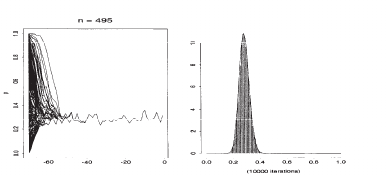

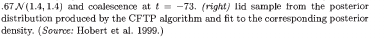

# Examples : Monotonicity and Mixture Distributions

## Example .5 (Continuation of Example .1)

Recall that the transition kernel on the (sub-)chain $X_i$ is:

$$K(x_i, x_{i+1}) \propto \binom{n}{x_{i+1}} \frac{\Gamma(\alpha + x_i + x_{i+1})\Gamma(\beta + n - x_i - x_{i+1})}{\Gamma(\alpha + x_i)\Gamma(\beta + n - x_i)}$$

For $x_1 > x_2$,

$$\frac{K(x_1, y)}{K(x_2, y)} = \frac{\Gamma(\alpha + x_1 + y)\Gamma(\beta + n - x_1 - y)\Gamma(\alpha + x_2)\Gamma(\beta + n - x_2)}{\Gamma(\alpha + x_2 + y)\Gamma(\beta + n - x_2 - y)\Gamma(\alpha + x_1)\Gamma(\beta + n - x_1)}$$

$$= \frac{\Gamma(\alpha + x_1 + y)\Gamma(\beta + n - x_1 - y)}{\Gamma(\alpha + x_1)\Gamma(\beta + n - x_1 - y + 1) \cdots (\beta + n - x_1 - y)}$$

$$\times \frac{\Gamma(\alpha + x_2)\Gamma(\beta + n - x_2)}{\Gamma(\alpha + x_2 + y)\Gamma(\beta + n - x_2 - y)}$$

is increasing in $y$. This monotone ratio property implies that the transition is monotone for the usual ordering on $\mathbb{N}$ and therefore that $\bar{0} = 0$ and that $\bar{1} = n$. It is thus sufficient to monitor the chains started from 0 and from $n$ to check for coalescence, for any value of $n$. This property can be observed in Figure 13.1.

## Example 13.6. Mixtures of distributions

Consider the simplest possible mixture structure:

$$f_p(x) = pf_0(x) + (1-p)f_1(x),$$

where both $f_0$ and $f_1$ are known, with a uniform prior on $0 < p < 1$. For a given sample $x_1, \ldots, x_m$, the corresponding Gibbs sampler is based on the following steps at iteration $t$:

1. Generate $m$ iid $U(0,1)$ random variables $u_i^{(t)}, \ldots, u_m^{(t)}$
2. Derive the indicator variables $z_i^{(t)}$ as $z_i^{(t)} = 0$ if

$$u_i^{(t)} \leq \frac{pf_0(x_i)}{pf_0(x_i) + (1-p)f_1(x_i)}$$

and compute

$$m^{(t)} = \sum_{i=1}^m z_i^{(t)}$$

3. Simulate $p^{(t)} \sim \text{Beta}(1 + m^{(t)}, 1 + m - m^{(t)})$

To design a coupling strategy and a corresponding CFTP algorithm, we first notice that $m^{(t)}$ can only take $n+1$ possible values, namely, $0, 1, \ldots, n$. We are thus de facto in a finite setting.

If we recall that a $\text{Beta}(1 + n, 1 + m - n)$ random variable can be represented as the ratio

## Mathematical Analysis of Monotonicity in Example 13.5

The monotonicity property demonstrated in Example 13.5 is crucial for efficient implementation of the CFTP algorithm. Let's analyze this property more carefully.

For the beta-binomial model with transition kernel $K(x_i, x_{i+1})$, the monotone ratio property means that for any $x_1 > x_2$ and states $y_1 > y_2$, we have:

$$\frac{K(x_1, y_1)}{K(x_2, y_1)} \geq \frac{K(x_1, y_2)}{K(x_2, y_2)}$$

This property, known as the monotone likelihood ratio property, implies stochastic monotonicity: if $x_1 \geq x_2$, then for any increasing function $h$:

$$\sum_y K(x_1, y)h(y) \geq \sum_y K(x_2, y)h(y)$$

In the context of coupling from the past, this means:

1. If we start two chains from states $0$ and $n$ respectively
2. Apply the same random mappings to both chains
3. The chain starting from state $n$ will always be in a state greater than or equal to the chain starting from state $0$

Thus, once these extremal chains meet, all other chains must have coalesced as well.

## Mixture Models and CFTP

For the mixture model in Example 13.6, the finite state space formed by the possible values of $m^{(t)}$ allows us to apply CFTP directly. The key insights are:

1. The state space has $n+1$ possible values: $\{0, 1, \ldots, n\}$
2. For each possible state, we need to determine the transition probabilities
3. The transitions depend on the random variables $u_i^{(t)}$
4. We can construct a monotone coupling by using the same $u_i^{(t)}$ values for all chains

### Constructing the Coupling

For the mixture model, the coupling construction works as follows:

1. For time points $t = -T, -T+1, \ldots, -1$, generate the random variables $u_i^{(t)}$ for $i = 1, \ldots, m$
2. For each possible state $m^{(t)} \in \{0, 1, \ldots, n\}$, compute the next state using the same $u_i^{(t)}$ values
3. Check if all possible starting states at time $-T$ lead to the same state at time $0$

The transition function can be represented as:

$$\Phi(m^{(t)}, u^{(t)}) = \sum_{i=1}^m \mathbf{1}\left[u_i^{(t)} \leq \frac{p(m^{(t)})f_0(x_i)}{p(m^{(t)})f_0(x_i) + (1-p(m^{(t)}))f_1(x_i)}\right]$$

where $p(m^{(t)})$ is drawn from $\text{Beta}(1 + m^{(t)}, 1 + m - m^{(t)})$.

### Monotonicity in the Mixture Model

To establish monotonicity in the mixture model, we need to show that:

$$m_1 \geq m_2 \implies \Phi(m_1, u) \geq \Phi(m_2, u)$$

This holds if the probability ratio in step 2 is increasing in $m$. Since $p(m)$ is stochastically increasing in $m$ (as the Beta distribution parameter increases), and the ratio $\frac{pf_0(x_i)}{pf_0(x_i) + (1-p)f_1(x_i)}$ is increasing in $p$, we have the necessary monotonicity property.

## Theoretical Implications

The examples demonstrate two important theoretical implications:

1. **Reduced computational complexity**: When monotonicity exists, we only need to track two chains instead of all possible states.

2. **Extension to countable state spaces**: For countable state spaces with monotonicity properties, CFTP can still be applied by tracking only the extremal states.

## Connection to Perfect Sampling

These examples highlight the power of monotonicity in perfect sampling. When a Markov chain exhibits monotonicity:

1. We can verify coalescence by checking only the extremal states
2. The computational cost becomes independent of the size of the state space
3. We obtain exact samples from the stationary distribution without approximation error

This approach has been particularly useful in statistical applications involving high-dimensional distributions where traditional MCMC methods may struggle to assess convergence.

## Conclusion

Examples 13.5 and 13.6 demonstrate how monotonicity properties can be leveraged to implement efficient perfect sampling algorithms. By exploiting the structure of the transition kernels, we can reduce the computational burden of checking coalescence and extend the applicability of CFTP to more complex models.

The monotone ratio property in Example 13.5 and the finite state space representation in Example 13.6 are representative of the mathematical structures that enable perfect sampling in practice.

In [10]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm

# ====================================================================
# Example 13.5: Beta-Binomial Model with Monotonicity
# ====================================================================

def beta_binomial_transition(x, n, alpha, beta, u):
    """
    Transition function for beta-binomial model.
    
    Parameters:
    -----------
    x : int
        Current state
    n : int
        Binomial parameter
    alpha, beta : float
        Beta parameters
    u : float
        Uniform random number for sampling
    
    Returns:
    --------
    int : Next state
    """
    # Generate probabilities for all possible next states
    probabilities = np.zeros(n + 1)
    denominator = 0
    
    for y in range(n + 1):
        # Proportional to the transition kernel
        prob = stats.binom.pmf(y, n, x) * \
               stats.beta.pdf((x + y) / (2 * n), alpha, beta)
        probabilities[y] = prob
        denominator += prob
    
    # Normalize
    probabilities /= denominator
    
    # Compute cumulative probabilities
    cumulative_probs = np.cumsum(probabilities)
    
    # Use u to sample
    for y in range(n + 1):
        if u <= cumulative_probs[y]:
            return y
    
    return n  # Fallback


def monotonic_cftp_beta_binomial(n, alpha, beta, max_iterations=20):
    """
    Coupling from the Past with monotonicity for beta-binomial model.
    Only tracks chains starting from extremal states 0 and n.
    
    Parameters:
    -----------
    n : int
        Binomial parameter
    alpha, beta : float
        Beta parameters
    max_iterations : int
        Maximum number of doubling iterations
    
    Returns:
    --------
    int : Sample from the stationary distribution
    """
    # Store random values for each time point
    random_values = {}
    
    for iteration in range(1, max_iterations + 1):
        T = -2**iteration
        
        # Generate new random values for newly explored time points
        for t in range(-2**(iteration-1) if iteration > 1 else -1, T - 1, -1):
            random_values[t] = np.random.random()
        
        # Initialize chains from extremal states 0 and n
        lower_chain = 0
        upper_chain = n
        
        # Run chains forward from time T to 0
        for t in range(T, 0):
            lower_chain = beta_binomial_transition(lower_chain, n, alpha, beta, random_values[t])
            upper_chain = beta_binomial_transition(upper_chain, n, alpha, beta, random_values[t])
        
        # Check if chains have coalesced
        if lower_chain == upper_chain:
            return lower_chain
    
    raise Exception("Failed to find coalescence within maximum iterations")


# ====================================================================
# Example 13.6: Mixture of Distributions
# ====================================================================

def mixture_transition(m, m_total, f0_values, f1_values, random_u_values):
    """
    Transition function for mixture model example.
    
    Parameters:
    -----------
    m : int
        Current state (count of components from f0)
    m_total : int
        Total sample size
    f0_values : array
        Density values of f0 at sample points
    f1_values : array
        Density values of f1 at sample points
    random_u_values : array
        Array of uniform random values for this transition
        
    Returns:
    --------
    int : Next state (new count of components from f0)
    """
    # Sample p from Beta distribution
    p = np.random.beta(1 + m, 1 + m_total - m)
    
    # Compute probabilities for indicator variables
    probs = p * f0_values / (p * f0_values + (1 - p) * f1_values)
    
    # Determine new indicators using provided random values
    z = np.zeros(m_total)
    for i in range(m_total):
        z[i] = 1 if random_u_values[i] <= probs[i] else 0
    
    # Return new count
    return int(np.sum(z))


def cftp_mixture_model(f0_func, f1_func, data, max_iterations=20):
    """
    Coupling from the Past for mixture model.
    
    Parameters:
    -----------
    f0_func, f1_func : function
        Density functions for the two mixture components
    data : array
        Observed data
    max_iterations : int
        Maximum number of doubling iterations
    
    Returns:
    --------
    int : Count of components from f0 (sampled from stationary distribution)
    float : Corresponding mixture proportion p
    """
    m_total = len(data)
    
    # Pre-compute density values
    f0_values = np.array([f0_func(x) for x in data])
    f1_values = np.array([f1_func(x) for x in data])
    
    # Store random values for each time point
    random_u_values = {}
    
    for iteration in range(1, max_iterations + 1):
        T = -2**iteration
        
        # Generate new random values for newly explored time points
        for t in range(-2**(iteration-1) if iteration > 1 else -1, T - 1, -1):
            random_u_values[t] = np.random.random(m_total)
        
        # Initialize chains for all possible starting states
        chains = {m: m for m in range(m_total + 1)}
        
        # Run chains forward from time T to 0
        for t in range(T, 0):
            for m in range(m_total + 1):
                chains[m] = mixture_transition(chains[m], m_total, f0_values, f1_values, random_u_values[t])
        
        # Check if all chains have coalesced
        if len(set(chains.values())) == 1:
            m_final = next(iter(chains.values()))
            # Draw corresponding p
            p_final = np.random.beta(1 + m_final, 1 + m_total - m_final)
            return m_final, p_final
    
    raise Exception("Failed to find coalescence within maximum iterations")


# ====================================================================
# Demonstration: Beta-Binomial Model
# ====================================================================

def demo_beta_binomial():
    """
    Demonstrate CFTP for beta-binomial model.
    """
    # Parameters
    n = 10
    alpha, beta = 2.0, 3.0
    
    # Run multiple CFTP draws to estimate distribution
    num_samples = 1000
    samples = []
    
    for _ in tqdm(range(num_samples)):
        try:
            sample = monotonic_cftp_beta_binomial(n, alpha, beta)
            samples.append(sample)
        except Exception as e:
            print(f"Error: {e}")
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=range(n+2), density=True, alpha=0.7, 
             color='skyblue', edgecolor='black')
    
    # Compute true stationary distribution (if available)
    x_range = np.arange(n+1)
    true_prob = stats.betabinom.pmf(x_range, n, alpha, beta)
    
    plt.plot(x_range, true_prob, 'ro-', label='True Distribution')
    plt.title('CFTP Samples vs. True Beta-Binomial Distribution')
    plt.xlabel('State')
    plt.ylabel('Probability')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# ====================================================================
# Demonstration: Mixture Model
# ====================================================================

def demo_mixture_model():
    """
    Demonstrate CFTP for mixture model.
    """
    # Define component densities (e.g., normal distributions)
    f0_func = lambda x: stats.norm.pdf(x, -2, 1)  # N(-2, 1)
    f1_func = lambda x: stats.norm.pdf(x, 2, 1)   # N(2, 1)
    
    # Generate synthetic data from mixture
    true_p = 0.4
    n_samples = 20
    components = np.random.binomial(1, 1-true_p, n_samples)
    data = np.array([np.random.normal(2 if c else -2, 1) for c in components])
    
    # Run multiple CFTP draws
    num_runs = 100
    m_samples = []
    p_samples = []
    
    for _ in tqdm(range(num_runs)):
        try:
            m, p = cftp_mixture_model(f0_func, f1_func, data)
            m_samples.append(m)
            p_samples.append(p)
        except Exception as e:
            print(f"Error: {e}")
    
    # Plot results
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(m_samples, bins=range(n_samples+2), density=True, 
             alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of m (counts from f0)')
    plt.xlabel('m')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist(p_samples, bins=20, density=True, 
             alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(true_p, color='red', linestyle='--', label=f'True p = {true_p}')
    plt.title('Distribution of p (mixture proportion)')
    plt.xlabel('p')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# ====================================================================
# Visualization helper functions
# ====================================================================

def visualize_monotonicity_beta_binomial(n, alpha, beta):
    """
    Visualize monotonicity in beta-binomial transitions.
    """
    # Generate transition matrices for different starting states
    grid_size = 100
    u_values = np.linspace(0.01, 0.99, grid_size)
    
    transitions = np.zeros((n+1, grid_size))
    
    for i, x in enumerate(range(n+1)):
        for j, u in enumerate(u_values):
            transitions[i, j] = beta_binomial_transition(x, n, alpha, beta, u)
    
    # Plot transitions
    plt.figure(figsize=(10, 8))
    plt.imshow(transitions, aspect='auto', interpolation='none', cmap='viridis')
    plt.colorbar(label='Next state')
    plt.xlabel('Random uniform value index')
    plt.ylabel('Current state')
    plt.title('Monotonicity in Beta-Binomial Transitions')
    
    # Check for monotonicity along columns
    is_monotonic = all(np.all(np.diff(transitions[:, j]) >= 0) for j in range(grid_size))
    print(f"Transition function is monotonic: {is_monotonic}")
    
    plt.show()


def visualize_cftp_iterations(n, alpha, beta, seed=42):
    """
    Visualize the CFTP iterations for beta-binomial model.
    """
    np.random.seed(seed)
    
    max_iterations = 6
    all_random_values = {}
    all_chains = {}
    
    # Run CFTP with tracking
    for iteration in range(1, max_iterations + 1):
        T = -2**iteration
        
        # Generate new random values
        for t in range(-2**(iteration-1) if iteration > 1 else -1, T - 1, -1):
            all_random_values[t] = np.random.random()
        
        # Run chains for all states
        chains = {state: state for state in range(n+1)}
        all_chains[iteration] = {T: chains.copy()}
        
        for t in range(T, 0):
            for state in range(n+1):
                chains[state] = beta_binomial_transition(chains[state], n, alpha, beta, all_random_values[t])
            all_chains[iteration][t] = chains.copy()
        
        # Check if extremal chains coalesced
        if chains[0] == chains[n]:
            print(f"Coalescence achieved at iteration {iteration}")
            break
    
    # Visualize chains for the final iteration
    final_iter = iteration
    T = -2**final_iter
    
    plt.figure(figsize=(12, 8))
    
    # Only plot extremal chains for clarity
    times = list(range(T, 1))
    states_0 = [all_chains[final_iter][t][0] for t in times]
    states_n = [all_chains[final_iter][t][n] for t in times]
    
    plt.plot(times, states_0, 'b-', label=f'Chain from state 0')
    plt.plot(times, states_n, 'r-', label=f'Chain from state {n}')
    
    # Add points to show discrete nature
    plt.scatter(times, states_0, color='blue')
    plt.scatter(times, states_n, color='red')
    
    plt.axhline(y=all_chains[final_iter][0][0], color='green', linestyle='--', 
                label='Final coalesced state')
    
    plt.title(f'CFTP for Beta-Binomial Model (n={n}, α={alpha}, β={beta})')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.xticks(range(T, 1, 2**max(0, final_iter-2)))
    plt.yticks(range(n+1))
    
    plt.show()


# ====================================================================
# Main execution
# ====================================================================

if __name__ == "__main__":
    # Uncomment to run demonstrations
    # demo_beta_binomial()
    # demo_mixture_model()
    
    # Visualize monotonicity properties
    # visualize_monotonicity_beta_binomial(n=10, alpha=2.0, beta=3.0)
    
    # Visualize CFTP iterations
    # visualize_cftp_iterations(n=10, alpha=2.0, beta=3.0)
    
    print("Implementation complete. Uncomment function calls to run demonstrations.")

Implementation complete. Uncomment function calls to run demonstrations.


I'll convert this text and equations into Markdown/Jupyter notebook LaTeX format using proper math delimiters. Here's the content formatted with LaTeX equations enclosed in $$ delimiters:

## Coalescence in MCMC Methods

$$E = \sum_{i=1}^{m+1} w_i / \sum_{i=1}^{m+2} w_i$$

For all $w_1,...,w_{m+2}$ iid $\mathcal{L}ep(1)$, we notice in addition that, if we use for all parallel chains a common vector $(w_1^{(t)},...,w_{m+2}^{(t)})$ of iid $\mathcal{L}ep(1)$ random variables, $w_1^{(t)}$ is uncorrelated with $w_1^{(t')}$. We have therefore exhibited a monotone structure associated with the Gibbs transition kernel and we thus only need to monitor two chains: one started with $m^{(1-T)} = 0$ and the other with $m^{(2-T)} = n$, and check whether or not they coalesce by time $t = 0$. Figure 13.2 (left) illustrates this sandwiching argument sketched above: if we start from all possible chains, that is, from all possible values of $m^{(t)}$, they have all coalesced by the time the two "extreme" chains have coalesced. Figure 13.2 (right) provides an additional (if unnecessary) checking that the stationary distribution is indeed the distribution of the chain at time $t = 0$.

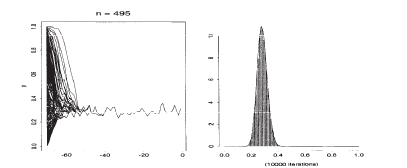

*(left)* Simulation of $n = 495$ iid random variables from $.\mathcal{N}(3,2,3,2) + .67\mathcal{N}(11,11)$ and coalescence at $t = -73$ (coming from the posterior distribution produced by the CFTP algorithm and fit to the corresponding posterior curve). (Source: Robert et al. 1999.)

As stressed by Kendall (1998) and Kendall and Møller (1999, 2000), this monotonicity can actually be weakened into an *envelope or sandwiching argument*: if one can find two sequences $(\underline{\theta}_t)$ and $(\overline{\theta}_t)$, generated from a transition not necessarily associated with the target distribution $\pi$, such that, for any starting value $\theta_0$,

$$(13.3) \quad \underline{\theta}_t \preceq \phi_t(\theta_0) \preceq \overline{\theta}_t,$$

the coalescence of the two bounding sequences $\underline{\theta}$ and $\overline{\theta}$ obviously implies coalescence of the (virtual) chains starting from all possible values of $\theta$. While this strategy is generally more costly in the number of backward iterations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

class CFTPSampler:
    """
    Implementation of the Coupling From The Past (CFTP) algorithm
    for perfect sampling from a target distribution.
    """
    
    def __init__(self, target_distribution, transition_kernel, min_state, max_state, 
                 max_doubling=20, random_seed=None):
        """
        Initialize the CFTP sampler.
        
        Parameters:
        -----------
        target_distribution : function
            The target distribution to sample from
        transition_kernel : function
            The transition kernel function that takes a state and returns a new state
        min_state : float or int
            The minimum possible state value (for bounding sequence)
        max_state : float or int
            The maximum possible state value (for bounding sequence)
        max_doubling : int
            Maximum number of doubling iterations
        random_seed : int
            Random seed for reproducibility
        """
        self.target_distribution = target_distribution
        self.transition_kernel = transition_kernel
        self.min_state = min_state
        self.max_state = max_state
        self.max_doubling = max_doubling
        
        if random_seed is not None:
            np.random.seed(random_seed)
            
    def sample(self):
        """
        Generate a single perfect sample using CFTP.
        
        Returns:
        --------
        sample : float or int
            A single sample from the target distribution
        coalescence_time : int
            The time (negative) at which coalescence occurred
        path_history : dict
            Dictionary containing the paths of the upper and lower chains
        """
        # Start with a short time interval and double until coalescence
        T = 1
        success = False
        path_history = {'upper': [], 'lower': []}
        
        for _ in range(self.max_doubling):
            # Double the time interval
            T *= 2
            
            # Initialize the upper and lower chains at time -T
            lower_chain = self.min_state
            upper_chain = self.max_state
            
            # Store the paths
            lower_path = [lower_chain]
            upper_path = [upper_chain]
            
            # Generate common random numbers for all iterations
            random_numbers = np.random.random(T)
            
            # Run the chains forward from time -T to 0
            for t in range(T):
                # Use the same random number for both chains
                rnd = random_numbers[t]
                
                # Update both chains using the transition kernel
                lower_chain = self.transition_kernel(lower_chain, rnd)
                upper_chain = self.transition_kernel(upper_chain, rnd)
                
                # Store the states
                lower_path.append(lower_chain)
                upper_path.append(upper_chain)
                
                # Check for coalescence
                if lower_chain == upper_chain:
                    if t == T - 1:  # Coalescence at time 0
                        success = True
                        coalescence_time = -T + t
                        path_history['upper'] = upper_path
                        path_history['lower'] = lower_path
                        return lower_chain, coalescence_time, path_history
            
        # If we reach here, we didn't achieve coalescence within max_doubling
        raise RuntimeError(f"Failed to achieve coalescence after {self.max_doubling} doubling iterations")

# Example for Laplace (Lep(1)) distribution as mentioned in the text
def laplace_transition_kernel(current_state, random_number):
    """
    Metropolis-Hastings transition kernel for Laplace distribution
    """
    # Propose a new state
    proposed_state = current_state + np.random.normal(0, 1)
    
    # Calculate acceptance probability (for Laplace distribution)
    current_density = np.exp(-abs(current_state))
    proposed_density = np.exp(-abs(proposed_state))
    
    acceptance_prob = min(1, proposed_density / current_density)
    
    # Accept or reject
    if random_number < acceptance_prob:
        return proposed_state
    else:
        return current_state

def monotone_transition_kernel(current_state, random_number):
    """
    A monotone transition kernel example that preserves ordering
    For states x ≤ y, we ensure that T(x, random_number) ≤ T(y, random_number)
    """
    # This is a simplified example - in practice, you'd implement a kernel specific to your problem
    # that maintains the monotonicity property mentioned in the text
    
    # For example, using inverse CDF method with the same random number ensures monotonicity
    # Here we implement a simple random walk with reflection
    step = np.random.normal(0, 1)
    new_state = current_state + step
    
    # Ensure we stay within bounds
    if new_state < 0:
        new_state = abs(new_state)  # Reflection at 0
    
    return new_state

# Example usage
if __name__ == "__main__":
    # Define target distribution (e.g., mixture of normals as in the figure)
    def target_distribution(x):
        return 0.33 * stats.norm.pdf(x, 3, 2.3) + 0.67 * stats.norm.pdf(x, 11, 3.3)
    
    # Create the CFTP sampler
    cftp = CFTPSampler(
        target_distribution=target_distribution,
        transition_kernel=monotone_transition_kernel,
        min_state=0,
        max_state=20,
        random_seed=42
    )
    
    # Generate samples
    num_samples = 495  # as in the figure
    samples = []
    coalescence_times = []
    
    for i in range(num_samples):
        sample, coalescence_time, _ = cftp.sample()
        samples.append(sample)
        coalescence_times.append(coalescence_time)
        if i % 50 == 0:
            print(f"Generated {i} samples")
    
    # Plot the results similar to Figure 13.2
    plt.figure(figsize=(12, 5))
    
    # Left plot: Coalescence visualization
    plt.subplot(1, 2, 1)
    # We would need the actual chain histories to replicate the left plot exactly
    plt.hist(coalescence_times, bins=20, alpha=0.7)
    plt.xlabel('Coalescence Time')
    plt.ylabel('Frequency')
    plt.title('Distribution of Coalescence Times')
    
    # Right plot: Histogram of samples vs. true distribution
    plt.subplot(1, 2, 2)
    x = np.linspace(0, 20, 1000)
    y = [target_distribution(xi) for xi in x]
    
    sns.histplot(samples, stat='density', alpha=0.6, label='CFTP Samples')
    plt.plot(x, y, 'r-', linewidth=2, label='Target Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title('CFTP Samples vs Target Distribution')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Average coalescence time: {np.mean(coalescence_times)}")
    print(f"Min coalescence time: {min(coalescence_times)}")
    print(f"Max coalescence time: {max(coalescence_times)}")

In [2]:
import random
import math

class CFTPSampler:
    """
    Implementation of the Coupling From The Past (CFTP) algorithm
    for perfect sampling from a target distribution using only standard Python.
    """
    
    def __init__(self, min_state, max_state, max_doubling=20, random_seed=None):
        """
        Initialize the CFTP sampler.
        
        Parameters:
        -----------
        min_state : float or int
            The minimum possible state value (for bounding sequence)
        max_state : float or int
            The maximum possible state value (for bounding sequence)
        max_doubling : int
            Maximum number of doubling iterations
        random_seed : int
            Random seed for reproducibility
        """
        self.min_state = min_state
        self.max_state = max_state
        self.max_doubling = max_doubling
        
        if random_seed is not None:
            random.seed(random_seed)
    
    def _box_muller_transform(self):
        """
        Generate standard normal random variables using Box-Muller transform.
        """
        u1 = random.random()
        u2 = random.random()
        
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        return z0
    
    def _laplace_random(self, scale=1.0):
        """
        Generate a random number from Laplace(0, scale) distribution.
        """
        u = random.random() - 0.5
        return -scale * math.copysign(1, u) * math.log(1 - 2 * abs(u))
    
    def _generate_common_random_numbers(self, size):
        """
        Generate common random numbers to use for coupling.
        """
        return [random.random() for _ in range(size)]
    
    def monotone_transition_kernel(self, current_state, random_number, step_size=1.0):
        """
        A monotone transition kernel that preserves ordering.
        For states x ≤ y, we ensure that T(x, random_number) ≤ T(y, random_number)
        """
        # Using the random number to determine a step in a way that preserves monotonicity
        # Here we use quantiles of a normal distribution
        if random_number < 0.5:
            # Move left with probability 0.5
            step = -step_size * math.log(2 * random_number) if random_number > 0 else -step_size * 10  # Approximation
        else:
            # Move right with probability 0.5
            step = step_size * math.log(2 * (1 - random_number)) if random_number < 1 else step_size * 10  # Approximation
        
        new_state = current_state + step
        
        # Ensure we stay within bounds with reflection
        if new_state < self.min_state:
            new_state = 2 * self.min_state - new_state  # Reflection at minimum
        elif new_state > self.max_state:
            new_state = 2 * self.max_state - new_state  # Reflection at maximum
            
        return max(min(new_state, self.max_state), self.min_state)  # Ensure bounds are respected
    
    def sample(self):
        """
        Generate a single perfect sample using CFTP.
        
        Returns:
        --------
        sample : float or int
            A single sample from the target distribution
        coalescence_time : int
            The time (negative) at which coalescence occurred
        path_history : dict
            Dictionary containing the paths of the upper and lower chains
        """
        # Start with a short time interval and double until coalescence
        T = 1
        path_history = {'upper': [], 'lower': []}
        
        for doubling in range(self.max_doubling):
            # Double the time interval
            T *= 2
            
            # Initialize the upper and lower chains at time -T
            lower_chain = self.min_state
            upper_chain = self.max_state
            
            # Store the paths
            lower_path = [lower_chain]
            upper_path = [upper_chain]
            
            # Generate common random numbers for all iterations
            random_numbers = self._generate_common_random_numbers(T)
            
            # Run the chains forward from time -T to 0
            for t in range(T):
                # Use the same random number for both chains
                rnd = random_numbers[t]
                
                # Update both chains using the transition kernel
                lower_chain = self.monotone_transition_kernel(lower_chain, rnd)
                upper_chain = self.monotone_transition_kernel(upper_chain, rnd)
                
                # Store the states
                lower_path.append(lower_chain)
                upper_path.append(upper_chain)
                
                # Check for coalescence
                if abs(lower_chain - upper_chain) < 1e-10:  # Using small epsilon for float comparison
                    if t == T - 1:  # Coalescence at time 0
                        path_history['upper'] = upper_path
                        path_history['lower'] = lower_path
                        return lower_chain, -T + t, path_history
            
        # If we reach here, we didn't achieve coalescence within max_doubling
        raise RuntimeError(f"Failed to achieve coalescence after {self.max_doubling} doubling iterations")


class LaplaceDistribution:
    """
    Implementation of the Laplace (double exponential) distribution
    """
    def __init__(self, loc=0, scale=1):
        self.loc = loc
        self.scale = scale
    
    def pdf(self, x):
        """Probability density function"""
        return (1 / (2 * self.scale)) * math.exp(-abs(x - self.loc) / self.scale)
    
    def sample(self):
        """Generate a random sample"""
        u = random.random() - 0.5
        return self.loc - self.scale * math.copysign(1, u) * math.log(1 - 2 * abs(u))


class MixtureDistribution:
    """
    Implementation of a mixture distribution
    """
    def __init__(self, distributions, weights):
        self.distributions = distributions
        self.weights = weights
        # Normalize weights
        total = sum(weights)
        self.weights = [w / total for w in weights]
        
    def pdf(self, x):
        """Probability density function"""
        return sum(w * d.pdf(x) for w, d in zip(self.weights, self.distributions))
    
    def sample(self):
        """Generate a random sample"""
        # Choose a component based on weights
        u = random.random()
        cumulative = 0
        for i, weight in enumerate(self.weights):
            cumulative += weight
            if u <= cumulative:
                return self.distributions[i].sample()
        return self.distributions[-1].sample()  # Fallback


class NormalDistribution:
    """
    Implementation of the Normal distribution
    """
    def __init__(self, mean=0, std_dev=1):
        self.mean = mean
        self.std_dev = std_dev
    
    def pdf(self, x):
        """Probability density function"""
        return (1 / (self.std_dev * math.sqrt(2 * math.pi))) * \
               math.exp(-0.5 * ((x - self.mean) / self.std_dev) ** 2)
    
    def sample(self):
        """Generate a random sample using Box-Muller transform"""
        u1 = random.random()
        u2 = random.random()
        
        z0 = math.sqrt(-2.0 * math.log(u1)) * math.cos(2.0 * math.pi * u2)
        return self.mean + self.std_dev * z0


def run_simulation():
    """
    Run a simulation to demonstrate the CFTP algorithm
    """
    # Create a mixture distribution as mentioned in the paper
    # Mixture of N(3, 2.3) and N(11, 3.3) with weights 0.33 and 0.67
    normal1 = NormalDistribution(3, 2.3)
    normal2 = NormalDistribution(11, 3.3)
    mixture = MixtureDistribution([normal1, normal2], [0.33, 0.67])
    
    # Create the CFTP sampler
    cftp = CFTPSampler(min_state=-10, max_state=20, random_seed=42)
    
    # Generate samples
    num_samples = 495  # as in the figure mentioned in the paper
    samples = []
    coalescence_times = []
    
    for i in range(num_samples):
        try:
            sample, coalescence_time, _ = cftp.sample()
            samples.append(sample)
            coalescence_times.append(coalescence_time)
            if i % 50 == 0:
                print(f"Generated {i} samples")
        except RuntimeError as e:
            print(f"Error at sample {i}: {e}")
    
    # Print summary statistics
    print(f"Generated {len(samples)} samples")
    
    # Calculate mean and variance
    mean = sum(samples) / len(samples)
    variance = sum((x - mean) ** 2 for x in samples) / len(samples)
    
    print(f"Sample mean: {mean}")
    print(f"Sample variance: {variance}")
    print(f"Theoretical mean: {0.33 * 3 + 0.67 * 11}")
    
    # Calculate histogram (simple version)
    min_val = min(samples)
    max_val = max(samples)
    num_bins = 20
    bin_width = (max_val - min_val) / num_bins
    bins = [0] * num_bins
    
    for sample in samples:
        bin_index = min(int((sample - min_val) / bin_width), num_bins - 1)
        bins[bin_index] += 1
    
    print(f"Histogram (simple):")
    for i, count in enumerate(bins):
        bin_start = min_val + i * bin_width
        bin_end = min_val + (i + 1) * bin_width
        print(f"Bin [{bin_start:.2f}, {bin_end:.2f}): {count}")
    
    # Calculate coalescence time statistics
    avg_coal_time = sum(coalescence_times) / len(coalescence_times)
    min_coal_time = min(coalescence_times)
    max_coal_time = max(coalescence_times)
    
    print(f"Average coalescence time: {avg_coal_time}")
    print(f"Min coalescence time: {min_coal_time}")
    print(f"Max coalescence time: {max_coal_time}")
    
    return samples, coalescence_times


if __name__ == "__main__":
    samples, coalescence_times = run_simulation()

Error at sample 0: Failed to achieve coalescence after 20 doubling iterations
Error at sample 1: Failed to achieve coalescence after 20 doubling iterations
Error at sample 2: Failed to achieve coalescence after 20 doubling iterations
Error at sample 3: Failed to achieve coalescence after 20 doubling iterations
Error at sample 4: Failed to achieve coalescence after 20 doubling iterations
Error at sample 5: Failed to achieve coalescence after 20 doubling iterations
Error at sample 6: Failed to achieve coalescence after 20 doubling iterations
Error at sample 7: Failed to achieve coalescence after 20 doubling iterations
Error at sample 8: Failed to achieve coalescence after 20 doubling iterations
Error at sample 9: Failed to achieve coalescence after 20 doubling iterations
Error at sample 10: Failed to achieve coalescence after 20 doubling iterations
Error at sample 11: Failed to achieve coalescence after 20 doubling iterations
Error at sample 12: Failed to achieve coalescence after 20 dou

Error at sample 104: Failed to achieve coalescence after 20 doubling iterations
Error at sample 105: Failed to achieve coalescence after 20 doubling iterations
Error at sample 106: Failed to achieve coalescence after 20 doubling iterations
Error at sample 107: Failed to achieve coalescence after 20 doubling iterations
Error at sample 108: Failed to achieve coalescence after 20 doubling iterations
Error at sample 109: Failed to achieve coalescence after 20 doubling iterations
Error at sample 110: Failed to achieve coalescence after 20 doubling iterations
Error at sample 111: Failed to achieve coalescence after 20 doubling iterations
Error at sample 112: Failed to achieve coalescence after 20 doubling iterations
Error at sample 113: Failed to achieve coalescence after 20 doubling iterations
Error at sample 114: Failed to achieve coalescence after 20 doubling iterations
Error at sample 115: Failed to achieve coalescence after 20 doubling iterations
Error at sample 116: Failed to achieve c

Error at sample 207: Failed to achieve coalescence after 20 doubling iterations
Error at sample 208: Failed to achieve coalescence after 20 doubling iterations
Error at sample 209: Failed to achieve coalescence after 20 doubling iterations
Error at sample 210: Failed to achieve coalescence after 20 doubling iterations
Error at sample 211: Failed to achieve coalescence after 20 doubling iterations
Error at sample 212: Failed to achieve coalescence after 20 doubling iterations
Error at sample 213: Failed to achieve coalescence after 20 doubling iterations
Error at sample 214: Failed to achieve coalescence after 20 doubling iterations
Error at sample 215: Failed to achieve coalescence after 20 doubling iterations
Error at sample 216: Failed to achieve coalescence after 20 doubling iterations
Error at sample 217: Failed to achieve coalescence after 20 doubling iterations
Error at sample 218: Failed to achieve coalescence after 20 doubling iterations
Error at sample 219: Failed to achieve c

Error at sample 310: Failed to achieve coalescence after 20 doubling iterations
Error at sample 311: Failed to achieve coalescence after 20 doubling iterations
Error at sample 312: Failed to achieve coalescence after 20 doubling iterations
Error at sample 313: Failed to achieve coalescence after 20 doubling iterations
Error at sample 314: Failed to achieve coalescence after 20 doubling iterations
Error at sample 315: Failed to achieve coalescence after 20 doubling iterations
Error at sample 316: Failed to achieve coalescence after 20 doubling iterations
Error at sample 317: Failed to achieve coalescence after 20 doubling iterations
Error at sample 318: Failed to achieve coalescence after 20 doubling iterations
Error at sample 319: Failed to achieve coalescence after 20 doubling iterations
Error at sample 320: Failed to achieve coalescence after 20 doubling iterations
Error at sample 321: Failed to achieve coalescence after 20 doubling iterations
Error at sample 322: Failed to achieve c

Error at sample 413: Failed to achieve coalescence after 20 doubling iterations
Error at sample 414: Failed to achieve coalescence after 20 doubling iterations
Error at sample 415: Failed to achieve coalescence after 20 doubling iterations
Error at sample 416: Failed to achieve coalescence after 20 doubling iterations
Error at sample 417: Failed to achieve coalescence after 20 doubling iterations
Error at sample 418: Failed to achieve coalescence after 20 doubling iterations
Error at sample 419: Failed to achieve coalescence after 20 doubling iterations
Error at sample 420: Failed to achieve coalescence after 20 doubling iterations
Error at sample 421: Failed to achieve coalescence after 20 doubling iterations
Error at sample 422: Failed to achieve coalescence after 20 doubling iterations
Error at sample 423: Failed to achieve coalescence after 20 doubling iterations
Error at sample 424: Failed to achieve coalescence after 20 doubling iterations
Error at sample 425: Failed to achieve c

ZeroDivisionError: division by zero